In [61]:

import pandas as pd

from sklearn.linear_model import LogisticRegression

import numpy as np

from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


In [62]:
train = pd.read_csv ("train.csv")
test_df = pd.read_csv("test.csv")
gender_submission = pd.read_csv ("gender_submission.csv")


In [63]:
train['Sex_binary'] = train.Sex.map({"male": 0, "female": 1}) 
test_df['Sex_binary'] = test_df.Sex.map({"male": 0, "female": 1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [64]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [65]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_binary
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


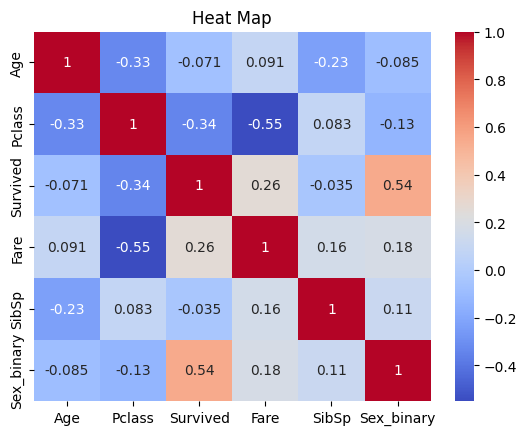

In [116]:
# seaborn offers customizable visualizations
import seaborn as sns
# this allows you to plot charts 
import matplotlib.pyplot as plt


# Select three variables of interest, for example, 'Age', 'Fare', and 'Pclass'.
# Replace these with your variables of interest if they are different. 
selected_variables = train[['Age','Pclass', 'Survived', 'Fare','SibSp','Sex_binary']] #inner list, outer brackets are how I reference columns in train

# Drop rows with missing values to ensure proper correlation calculation
selected_variables = selected_variables.dropna()

# Calculate the correlation matrix
corr_matrix = selected_variables.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')# annot=true means insert the values visually withing the squares. 
plt.title("Heat Map")
plt.show()
# The below shows the correlation highest positive correlation

In [67]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [68]:
#Used pandas:Took and mergeed PassengerID and on two different CSVs(gender_Sub & Test) Think Inner Join SQL
test = pd.merge(test_df, gender_submission, on = "PassengerId", how="inner")
test.head()
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_binary,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000


In [69]:
# Created binary representation for Pclass
train['FirstClass'] = train.Pclass.apply(lambda p: 1 if p == 1 else 0)
test['FirstClass'] = test.Pclass.apply(lambda p: 1 if p == 1 else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,FirstClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [70]:
# Created binary representation for 2nd Pclass
train['SecondClass'] = train.Pclass.apply( lambda p: 1 if p == 2 else 0)
test['SecondClass'] = test.Pclass.apply( lambda p: 1 if p == 2 else 0)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,1


In [71]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Survived,FirstClass,SecondClass
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1,0,0


In [72]:
# Created binary representation for 3nd Pclass
train['ThirdClass'] = train.Pclass.apply( lambda p: 1 if p == 3 else 0)
test['ThirdClass'] = test.Pclass.apply( lambda p: 1 if p == 3 else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,FirstClass,SecondClass,ThirdClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1


In [73]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Survived,FirstClass,SecondClass,ThirdClass
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1,0,0,1


In [74]:
# train['Sex_binary'] = train.Sex.map({"male": 0, "female": 1}) 
# test['Sex_binary'] = test.Sex.map({"male": 0, "female": 1})
# test['Sex_binary'] = test.Sex.map({"male": 0, "female": 1})
# train.head()

In [75]:
#Let's fill in the ages with the mean of all ages.
train['Age'].fillna(value = round(train['Age'].mean()), inplace = True) #look up .fillna function
test['Age'].fillna(value = round(test['Age'].mean()), inplace = True) 
train["Age"].count() #now we have every row accounted for.

C:\Users\julio\AppData\Local\Temp\ipykernel_38856\3434913805.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(value = round(train['Age'].mean()), inplace = True) #look up .fillna function
C:\Users\julio\AppData\Local\Temp\ipykernel_38856\3434913805.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

891

In [76]:
#I want to focus on training a model on Age, Sex_binary, FirstClass, SecondClass, ThirdClass, "SibSp", "Parch", "Fare"
#The goal is to predict whether or not the user survived based on this. 
train_features = train[["Age", "Sex_binary", "FirstClass", "SecondClass", "ThirdClass"]] #survived = x1 + x2 + x3 + x4 + x5 + x6
train_labels = train["Survived"] # what were trying to find. Independent Variable
test_features = test[["Age", "Sex_binary", "FirstClass", "SecondClass", "ThirdClass"]]
test_labels = test["Survived"]


In [77]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler


In [78]:
print(train_features)

      Age  Sex_binary  FirstClass  SecondClass  ThirdClass
0    22.0           0           0            0           1
1    38.0           1           1            0           0
2    26.0           1           0            0           1
3    35.0           1           1            0           0
4    35.0           0           0            0           1
..    ...         ...         ...          ...         ...
886  27.0           0           0            1           0
887  19.0           1           1            0           0
888  30.0           1           0            0           1
889  26.0           0           1            0           0
890  32.0           0           0            0           1

[891 rows x 5 columns]


In [79]:
scaler_maxabs = MaxAbsScaler()
train_features_norm_max = scaler_maxabs.fit_transform(train_features)
test_features_norm_max = scaler_maxabs.transform(test_features)

In [80]:
scaler_Rob = RobustScaler()
train_features_norm_Rob = scaler_Rob.fit_transform(train_features)
test_features_norm_Rob = scaler_Rob.transform(test_features)


In [81]:
scaler = StandardScaler()## normalizes data so its on all the same scale. .95 rounded up, .33 rounded down. Z score normalization
train_features_norm = scaler.fit_transform(train_features)
test_features_norm = scaler.transform(test_features)

In [82]:
train_features_norm_max

array([[0.275, 0.   , 0.   , 0.   , 1.   ],
       [0.475, 1.   , 1.   , 0.   , 0.   ],
       [0.325, 1.   , 0.   , 0.   , 1.   ],
       ...,
       [0.375, 1.   , 0.   , 0.   , 1.   ],
       [0.325, 0.   , 1.   , 0.   , 0.   ],
       [0.4  , 0.   , 0.   , 0.   , 1.   ]])

In [83]:
train_features_norm_Rob

array([[-0.61538462,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.61538462,  1.        ,  1.        ,  0.        , -1.        ],
       [-0.30769231,  1.        ,  0.        ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [-0.30769231,  0.        ,  1.        ,  0.        , -1.        ],
       [ 0.15384615,  0.        ,  0.        ,  0.        ,  0.        ]])

In [84]:
train_features_norm

array([[-0.59705478, -0.73769513, -0.56568542, -0.51015154,  0.90258736],
       [ 0.63416229,  1.35557354,  1.76776695, -0.51015154, -1.10792599],
       [-0.28925051,  1.35557354, -0.56568542, -0.51015154,  0.90258736],
       ...,
       [ 0.01855376,  1.35557354, -0.56568542, -0.51015154,  0.90258736],
       [-0.28925051, -0.73769513,  1.76776695, -0.51015154, -1.10792599],
       [ 0.17245589, -0.73769513, -0.56568542, -0.51015154,  0.90258736]])


# Logistic Regression


In [85]:
#import the model
from sklearn.linear_model import LogisticRegression


In [86]:
#initialize the model ** Calling the function, and the function name is just a math problem. If I had 3 models that I wanted to run Lg regression I would name the variable lr_model1, lr_model2 etc. 
lr_model = LogisticRegression()


In [87]:
# Train the model / fit the model ** Same thing
lr_model.fit(train_features_norm, train_labels)

LogisticRegression()

In [88]:
# Score the model... Important to do this right!!
from sklearn.metrics import accuracy_score # Already imported at the top, but important for process memorization

y_predict = lr_model.predict(test_features_norm) # Taking the test data to predict if those people are going to survive or not. 

log_model_accuracy_score = accuracy_score(test_labels,y_predict) # Take what I have in Y predict and compare against the actual answers which are the test labels. 

print(f'accuracy = {log_model_accuracy_score}') # does math to create accuracy score of the log model. Facts vs predictions

accuracy = 0.9641148325358851


In [89]:
y_predict # prints Y prediction. 

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [90]:
test_labels # look at the top results and verify with the below results. ** Across above, down below in second column. 

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [91]:
Jack = np.array([20.0, 0.0, 0.0, 0.0, 1.0]) # Added ficticious data to np array to predict 
Rose = np.array([17.0, 1.0, 1.0, 0.0, 0.0])
GoyaBean= np.array([34.0, 0.0, 0.0, 1.0, 0.0])

In [92]:
predict_pass = np.array([Jack, Rose, GoyaBean])# made numpy array with the data from up above. Packaging variables to run through Scaler.Transform
predict_pass = scaler.transform(predict_pass)# Taking same array and transforming it so the data above is all on the same scale. 

c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [93]:
print(lr_model.predict(predict_pass)) 
print(lr_model.predict_proba(predict_pass))

[0 1 0]
[[0.88542484 0.11457516]
 [0.05003392 0.94996608]
 [0.7874295  0.2125705 ]]


# Steps:
### 1.Import, 2.Intialize, 3.Train, 4.Make Predictions, 5.Evaluate, 6.Analyze, 7. Predict, 8. Interpret

# Lets Import models : Decision Tree and Random Forest

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Init The Models

In [95]:
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
RFC_model = RandomForestClassifier(n_estimators=90, criterion= "gini", max_depth=5)


# Train Model

In [96]:
tree_model.fit(train_features_norm, train_labels)
RFC_model.fit(train_features_norm, train_labels)

RandomForestClassifier(max_depth=5, n_estimators=90)

# Predictions

In [97]:
tree_predictions = tree_model.predict(test_features_norm)
rfc_predictions = RFC_model.predict(test_features_norm)

# Evaluate Models

In [98]:
tree_accuracy = accuracy_score(test_labels, tree_predictions)
rfc_accuracy = accuracy_score(test_labels, rfc_predictions)

print('Decision tree accuracy:', tree_accuracy)
print('Random Forest accuracy:', rfc_accuracy)



Decision tree accuracy: 0.9569377990430622
Random Forest accuracy: 0.9449760765550239


# Predict 
### Define new data samples

In [99]:
Jack = np.array([20.0, 0.0, 0.0, 0.0, 1.0])
Rose = np.array([17.0, 1.0, 1.0, 0.0, 0.0])
GoyaBean = np.array([34.0, 0.0, 0.0, 1.0, 0.0])
predict_pass = np.array([Jack, Rose, GoyaBean])


### Normalize new data Samples

In [100]:
predict_pass_norm = scaler.transform(predict_pass)

c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [101]:
# Predict with Decision Tree
new_tree_predictions = tree_model.predict(predict_pass_norm)

# Predict with Random Forest
new_rfc_predictions = RFC_model.predict(predict_pass_norm)

print('New data predictions with Decision Tree:', new_tree_predictions)
print('New data predictions with Random Forest:', new_rfc_predictions)


New data predictions with Decision Tree: [0 1 0]
New data predictions with Random Forest: [0 1 0]


## Import SVC

In [102]:
from sklearn.svm import LinearSVC

## Init/Train the LinearSVC  + Multiple scalers

In [103]:
linerar_SVC_model = LinearSVC() 
linerar_SVC_model_maxabs = LinearSVC()#
linerar_SVC_model_Rob = LinearSVC()

linerar_SVC_model.fit (train_features_norm, train_labels) # I am fitting the output data from the Std Scaler to a linear SVC model. 
linerar_SVC_model_maxabs.fit (train_features_norm_max, train_labels) # same as above but for the MaxABs Scaler
linerar_SVC_model_Rob.fit (train_features_norm_Rob, train_labels) # same as above but for the Robust Scaler

c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

## Predict

In [104]:
linerar_SVC_predictions = linerar_SVC_model.predict(test_features_norm)# Calling the predict from the fitted model and assigning it to a variable. 
linerar_SVC_predictions_maxabs = linerar_SVC_model_maxabs.predict(test_features_norm_max)# same as above 
linerar_SVC_predictions_Rob = linerar_SVC_model_Rob.predict(test_features_norm_Rob)# same as above 

## Evaluate Model

In [105]:
linear_svc_accuracy = accuracy_score(test_labels,linerar_SVC_predictions) 
# Were using the accuracy function using "test_labes--Known survival data " against the predicted survival data "linerar_SVC_predictions". 
linear_svc_accuracy_maxabs = accuracy_score(test_labels,linerar_SVC_predictions_maxabs)# same as above but with the maxabs_predictions
linear_svc_accuracy_Rob = accuracy_score(test_labels,linerar_SVC_predictions_Rob)
print("linearSVC_Standard Scaler Accuracy:", linear_svc_accuracy)
print("linearSVC_MaxAbs Scaler Accuracy:", linear_svc_accuracy_maxabs)
print("linearSVC_Robust Scaler Accuracy:", linear_svc_accuracy_Rob)

linearSVC_Standard Scaler Accuracy: 0.9856459330143541
linearSVC_MaxAbs Scaler Accuracy: 0.9856459330143541
linearSVC_Robust Scaler Accuracy: 0.9856459330143541


In [106]:

from sklearn.base import clone # clone ensures that each new subset of features is evaluated using a fresh estimator, not one that has been already fitted to other data.
from itertools import combinations # Generate all possible combinations of feature subsets for evaluation.

## Sequential Backward Selection Graph


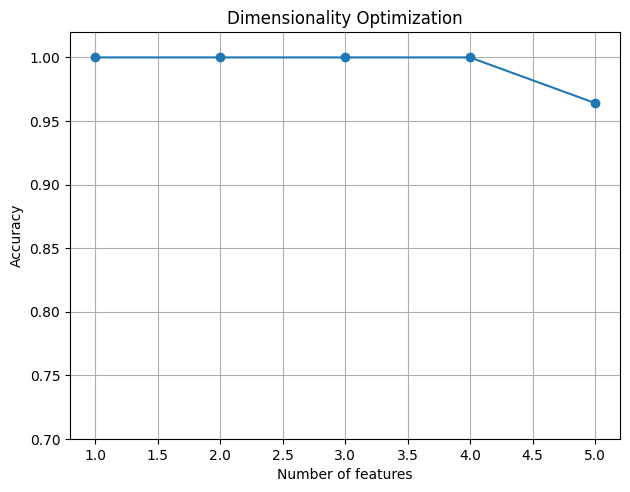

In [115]:
# Modified SBS algorithm without internal train-test split because my Train and Test data came split. 
class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.random_state = random_state

    def fit(self, X_train, y_train, X_test, y_test):
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

# My pre-split data
# renamed actual training and testing feature and label sets
X_train = train_features_norm  # normalized training features
y_train = train_labels         # Training labels
X_test = test_features_norm    # Normalized testing features
y_test = test_labels           # Testing labels

# Using Logistic Regression with SBS
lr = LogisticRegression()
sbs = SBS(lr, k_features=1)
sbs.fit(X_train, y_train, X_test, y_test)  # Pass both training and testing data

# Plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])  # I can adjust this based on my accuracy range
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.title("Dimensionality Optimization")
plt.show()
# @ 4 features there is a "Point of diminishing returns"

## Logistic regression evaluation graph

Feature ranking:
 1) Sex_binary                     0.533915
 2) Age                            0.231914
 3) ThirdClass                     0.127361
 4) FirstClass                     0.078330
 5) SecondClass                    0.028480


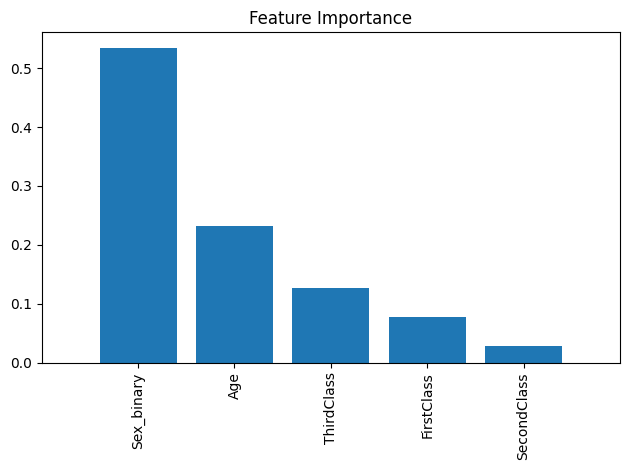

In [108]:
# define feature labels
feat_labels = ['Age', 'Sex_binary', 'FirstClass', 'SecondClass', 'ThirdClass']

# Forest model is stored in 'RFC_model'
forest = RFC_model

# Get the importance of each feature
importances = forest.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(train_features_norm.shape[1]):  # using train_features_norm 
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title('Feature Importance')
plt.bar(range(train_features_norm.shape[1]), importances[indices], align='center')
plt.xticks(range(train_features_norm.shape[1]), [feat_labels[i] for i in indices], rotation=90)
plt.xlim([-1, train_features_norm.shape[1]])
plt.tight_layout()
plt.show()

In [109]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("Scaler", StandardScaler()), 
    ("SVC", SVC()),

])

X_train = train_features # normalized training features
y_train = train_labels         # Training labels
X_test = test_features    # Normalized testing features
y_test = test_labels           # Testing labels
pipeline.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('SVC', SVC())])

C:\Users\julio\AppData\Local\Temp\ipykernel_38856\2106810830.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(train_sizes, train_mean, 'b-', label='Training score', color='darkblue')  # Blue color for training score
C:\Users\julio\AppData\Local\Temp\ipykernel_38856\2106810830.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(train_sizes, test_mean, 'g-', label='Cross-validation score', color='green')  # Green color for cross-validation score


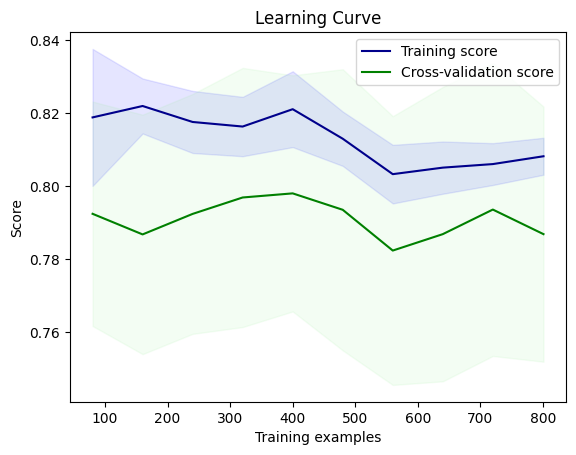

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming 'pipeline', 'X_train', and 'y_train' are already defined and imported as needed
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv=10, n_jobs=3, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate means and standard deviations for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, 'b-', label='Training score', color='darkblue')  # Blue color for training score
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.plot(train_sizes, test_mean, 'g-', label='Cross-validation score', color='green')  # Green color for cross-validation score
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='lightgreen', alpha=0.1)

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.show()


In [111]:

from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    'SVC__C': [0.1, 1, 10],  # Regularization parameter
    'SVC__kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'SVC__gamma': ['scale', 'auto', 0.1, 1]    # Kernel coefficient for 'rbf' and 'poly'
}

random_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', refit=True)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_accuracy = random_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

Best parameters: {'SVC__kernel': 'rbf', 'SVC__gamma': 'auto', 'SVC__C': 10}
Best accuracy: 0.7980038917833155


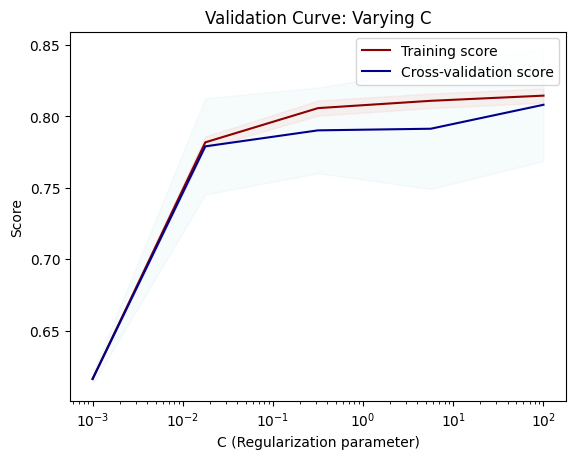

Accuracy Score: 0.9689 ± 0.0349


In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve, cross_val_score


param_name = 'SVC__C'  # Choose a hyperparameter to vary
param_range = np.logspace(-3, 2, num=5)

train_scores, test_scores = validation_curve(
    pipeline, X_train, y_train, param_name=param_name, param_range=param_range, cv=10)

# Calculate means and standard deviations 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.plot(param_range, train_mean, label='Training score', color='darkred')  # Red color for the training score
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='salmon', alpha=0.1)  # Light red for the area
plt.plot(param_range, test_mean, label='Cross-validation score', color='darkblue')  # Blue color for the cross-validation score
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='lightblue', alpha=0.1)  # Light blue for the area

plt.title("Validation Curve: Varying C")
plt.xlabel("C (Regularization parameter)")
plt.ylabel("Score")
plt.legend()
plt.xscale('log')  # Setting the x-axis to logarithmic scale for better visualization
plt.show()

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10)
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)
linerar_SVC_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, linerar_SVC_pred)
print(f"Accuracy Score: {accuracy:.4f} ± {cv_std:.4f}")


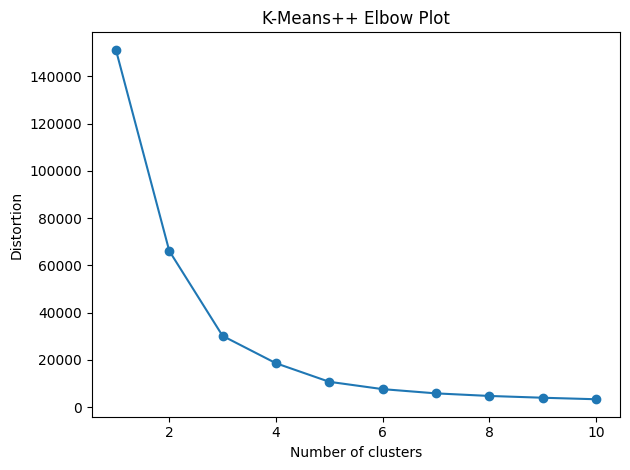

In [114]:
from sklearn.cluster import KMeans
#from sklearn.pipeline import Pipeline
#pipeline = Pipeline([
#    ("Scaler", StandardScaler()), 
#    ("KMeans", SVC()),
#
#])

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                random_state=0)
    km.fit(X_train)
    distortions.append(km.inertia_)


plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("K-Means++ Elbow Plot")
plt.tight_layout()
plt.show() 